In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [34]:
df = pd.read_csv("Life Expectancy Data.csv")

Исследовать данные.

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


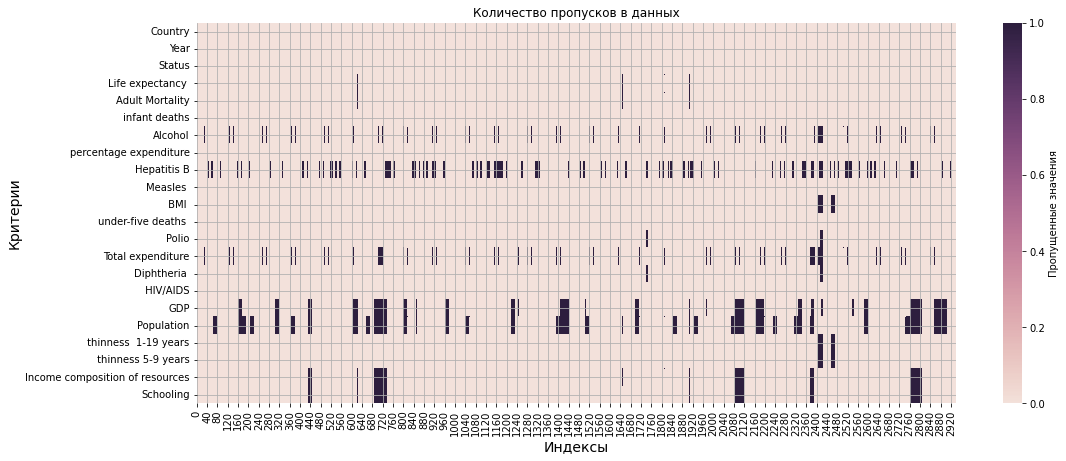

In [35]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

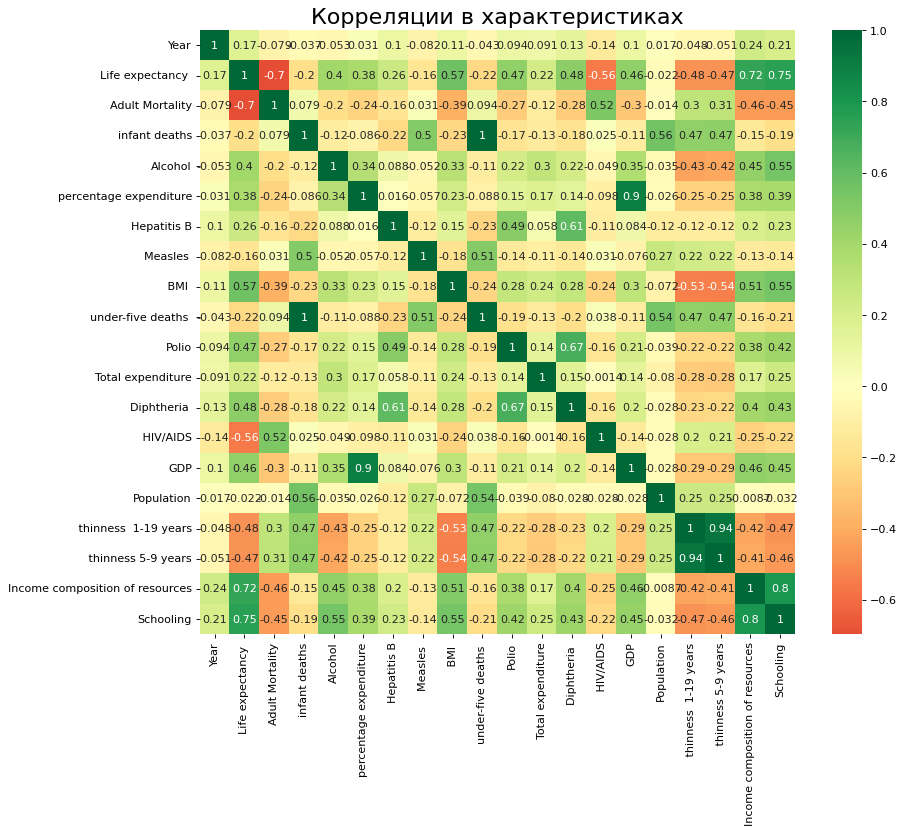

In [36]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

Построить модель линейной регрессии.

In [37]:
cntr = list(df['Country'].unique())
for i in range(len(df['Country'])):
  df.loc[i, 'Country'] = cntr.index(df.loc[i, 'Country'])
  df.loc[i, 'Year'] = int(df.loc[i, 'Year']) - 2000
  if df.loc[i, 'Status'] == "Developing":
    df.loc[i, 'Status'] = 0
  else:
    df.loc[i, 'Status'] = 1
df = df[df['Life expectancy '].isnull() == False]
df = df[df['Alcohol'].isnull() == False]
df = df[df['Hepatitis B'].isnull() == False]
df = df[df[' BMI '].isnull() == False]
df = df[df['Total expenditure'].isnull() == False]
df = df[df['GDP'].isnull() == False]
df = df[df['Population'].isnull() == False]

In [38]:
y = df['Life expectancy ']
x = df.drop(columns='Life expectancy ')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Получить коэффиценты уравнения линейной регрессии.

In [45]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

54.19003280862307 [ 5.14884008e-04 -1.17927698e-01  6.60766189e-01 -1.80310123e-02
  8.06147593e-02 -1.28529789e-01  4.32257089e-04  2.79135865e-04
 -1.07901346e-05  2.94781568e-02 -6.02551414e-02  8.86406967e-03
  9.02061139e-02  6.68789119e-03 -4.24350979e-01  1.51001917e-05
 -1.08510389e-09 -3.46481439e-02 -3.58392795e-02  1.03169204e+01
  8.97678272e-01]


Написать уравнение линейной регрессии.

In [46]:
for i in range(13):
  if w1[i]>0:
    print('y =', w0, '+', w1[i],'* x')
  else:
    print('y =',w0, w1[i],'* x')

y = 54.19003280862307 + 0.0005148840082791419 * x
y = 54.19003280862307 -0.11792769768754904 * x
y = 54.19003280862307 + 0.6607661885554711 * x
y = 54.19003280862307 -0.018031012308341428 * x
y = 54.19003280862307 + 0.08061475933557134 * x
y = 54.19003280862307 -0.12852978881329286 * x
y = 54.19003280862307 + 0.0004322570887118886 * x
y = 54.19003280862307 + 0.00027913586529533 * x
y = 54.19003280862307 -1.079013461664343e-05 * x
y = 54.19003280862307 + 0.029478156811158222 * x
y = 54.19003280862307 -0.060255141391681366 * x
y = 54.19003280862307 + 0.00886406967199129 * x
y = 54.19003280862307 + 0.09020611394765828 * x


Визуализировать данные и полученное уравнение линейной регрессии.

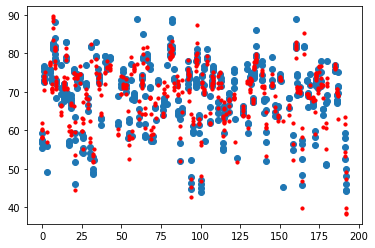

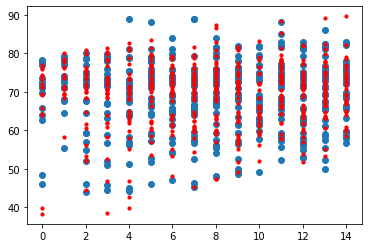

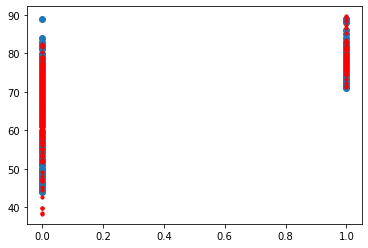

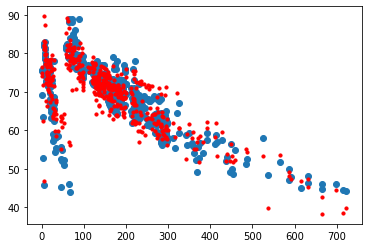

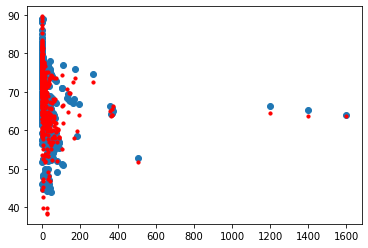

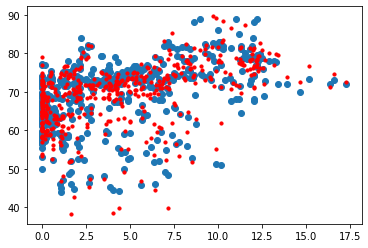

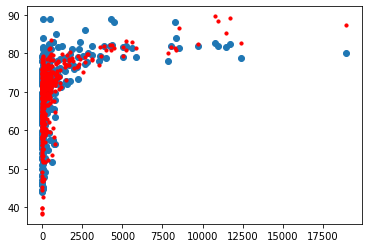

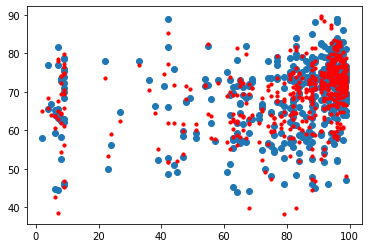

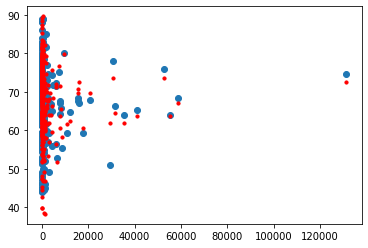

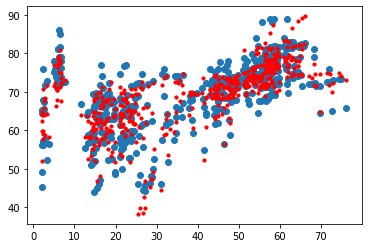

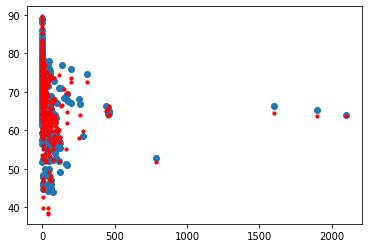

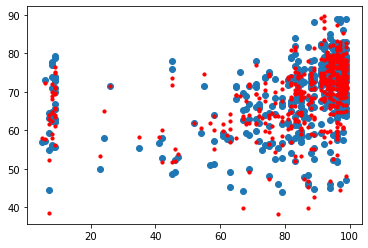

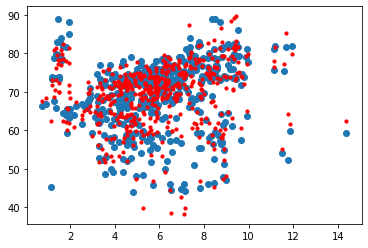

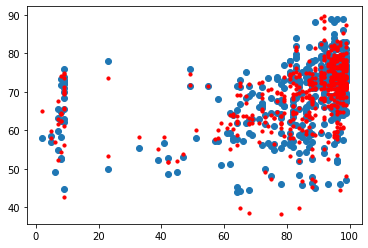

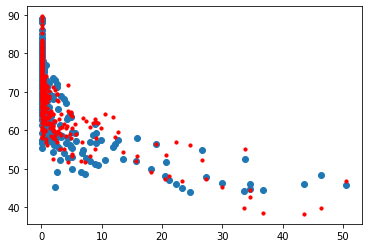

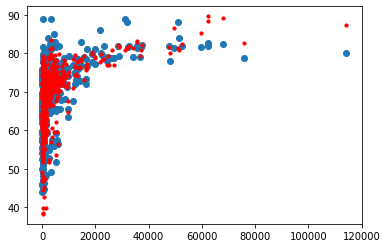

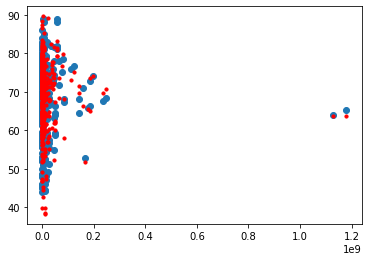

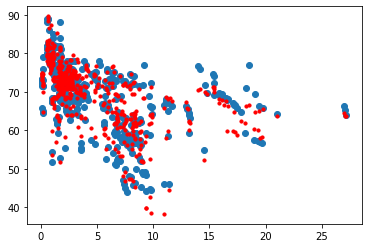

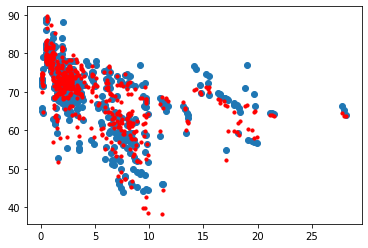

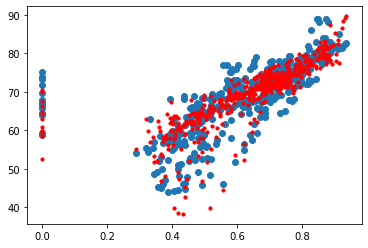

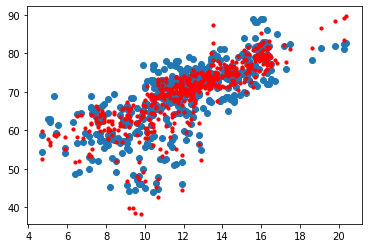

In [47]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

Оценивать полученную модель с помощью MSE, MAE, R2.

In [48]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.8769450877737768
Mean Squared Error: 14.738978674102542
R2 score: 0.8127287802109631


Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.